In [56]:
%load_ext autoreload
%autoreload 2

from vae_module import VAE
import torch
from torch.utils.data import DataLoader

from dataset import get_dataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from vae_training import calculate_sample_probabilities


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/pytorch_lightning/loggers/wandb.py:395: UserWarning: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
  rank_zero_warn(
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)


In [57]:

device = torch.device("cuda:3") if torch.cuda.is_available() else torch.device("cpu")
run_id_two_classes = "e4qh7h6r"
run_id_four_classes = "1mg69vwh"
model = VAE.load_from_checkpoint(f"./bias-skin-lesion-detection/{run_id_two_classes}/checkpoints/vae-final.cpkt", map_location=device)

#mean = [194.7155, 139.2602, 145.4779]
#std = [36.0167, 38.9894, 43.4381]
mean = [192.1314, 141.6559, 147.6526]
std = [33.1019, 38.3609, 43.3686]

def denormalize_image(image):
    image = image.cpu().detach().permute(1, 2, 0).numpy()
    image = image * std + mean
    image = image.astype(np.uint8)
    return image

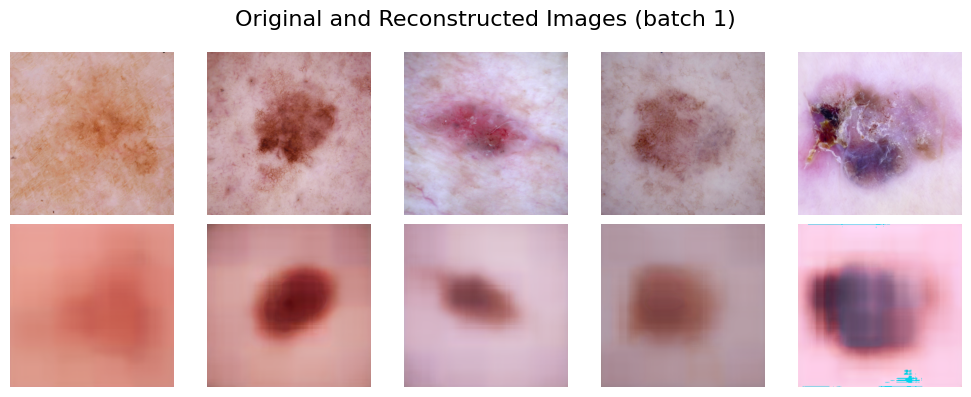

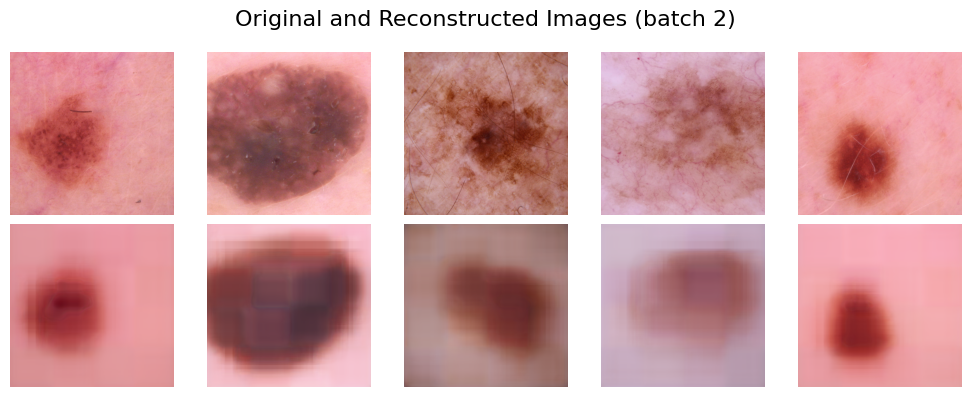

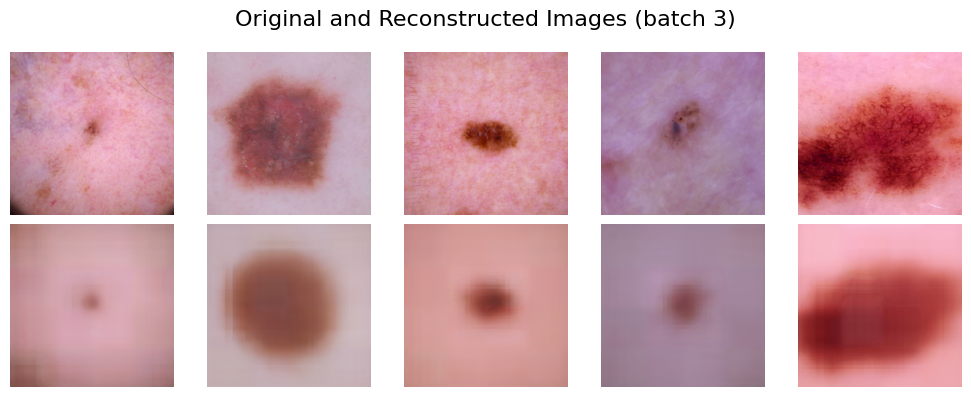

wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)


In [49]:
# Visualize some images from the validation set

val_set = get_dataset(dataset_name = "train", under_sampling=True, num_classes=4)
val_loader = DataLoader(val_set, batch_size=5, shuffle=True, drop_last=False, num_workers=1)
counter = 1
for batch in val_loader:
    imgs, labels = batch
    imgs = imgs.to(device)
    original_imgs = imgs
    
    recon_imgs = model.forward(imgs)
    
    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    
    # add original images
    for i, ax in enumerate(axes[0]):
        image = denormalize_image(original_imgs[i])
        ax.imshow(image)
        ax.axis('off')

    # add reconstructed images
    for i, ax in enumerate(axes[1]):
        image = denormalize_image(recon_imgs[i])
        ax.imshow(image)
        ax.axis('off')
        
    plt.suptitle(f"Original and Reconstructed Images (batch {counter})", fontsize=16)
    plt.tight_layout()

    plt.show()

    counter += 1
    if counter >= 4:
        break

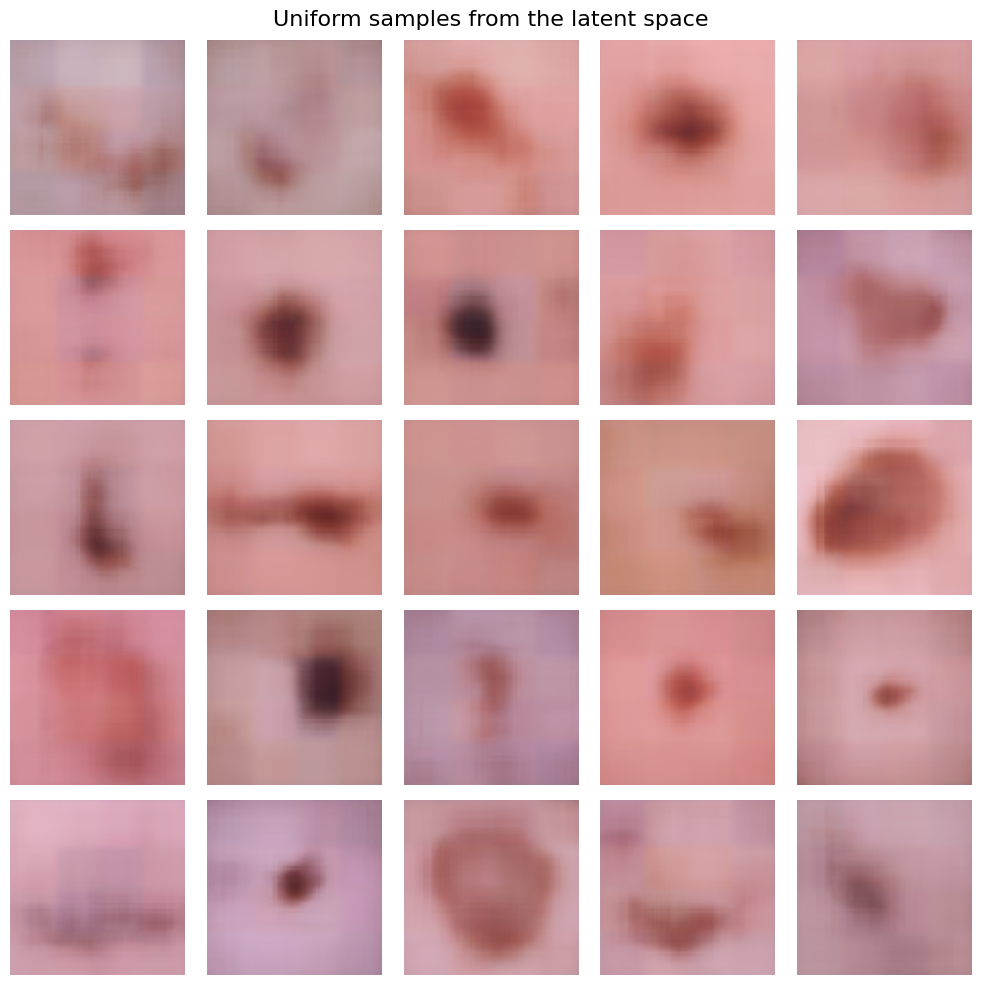

In [50]:
# Visualize random samples from the latent space

num_samples = 25
random_imgs = model.generate_samples(num_samples)
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

# add original images
for i, ax in enumerate(axes.flat):
    image = denormalize_image(random_imgs[i])
    ax.imshow(image)
    ax.axis('off')

plt.suptitle("Uniform samples from the latent space", fontsize=16)
plt.tight_layout()

plt.show()

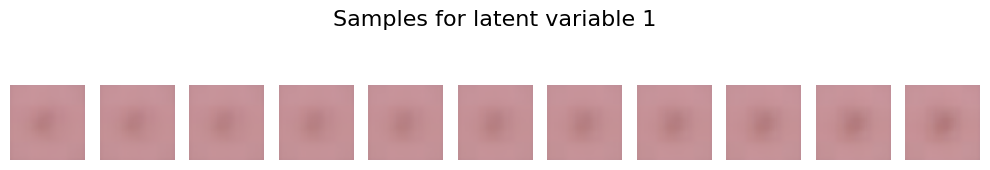

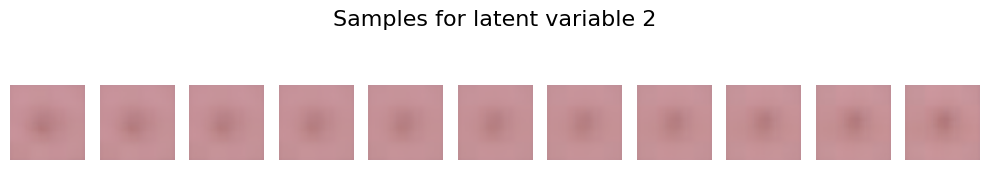

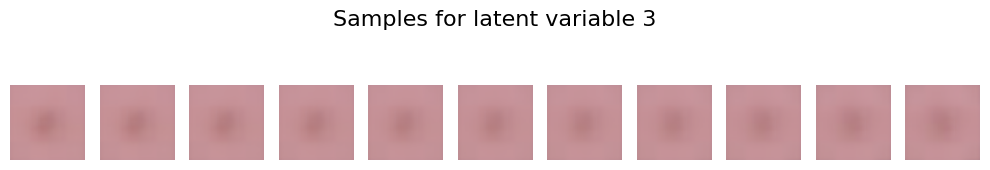

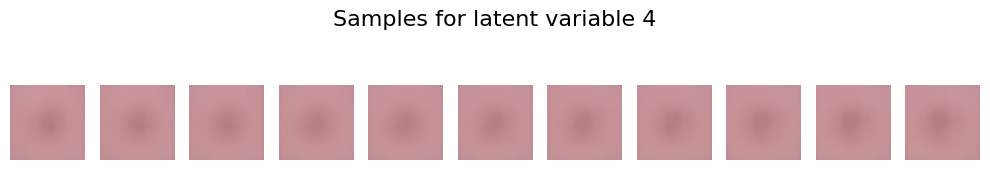

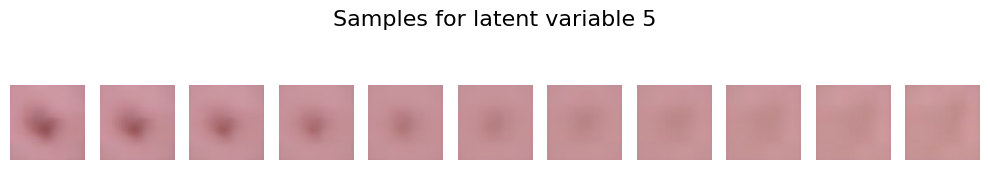

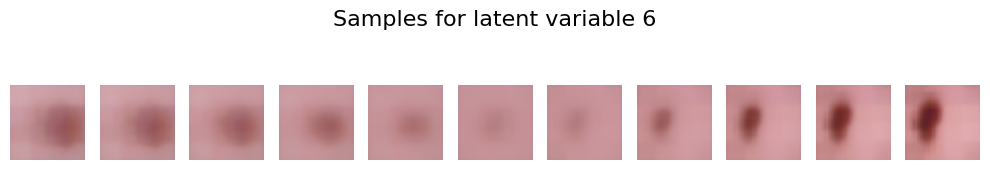

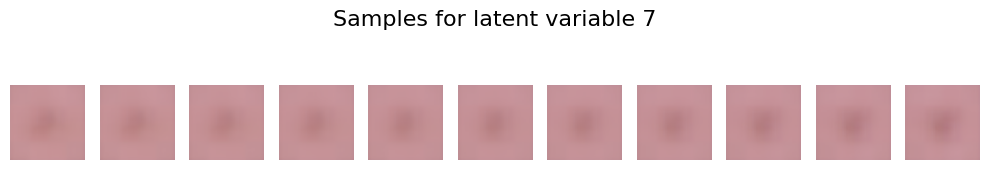

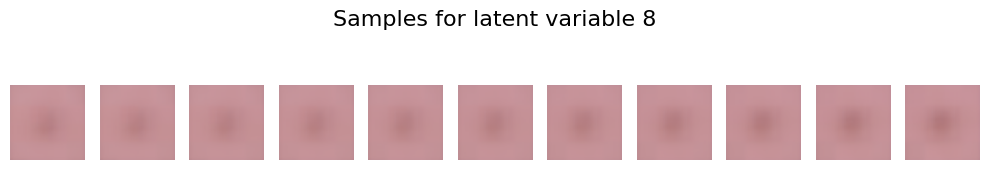

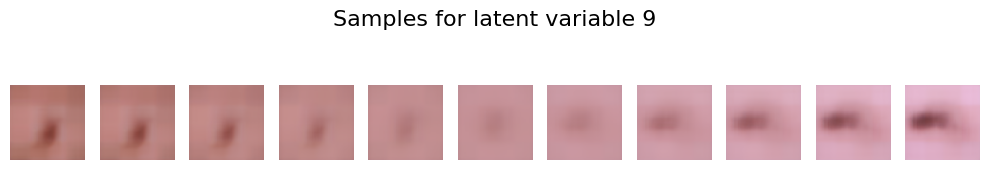

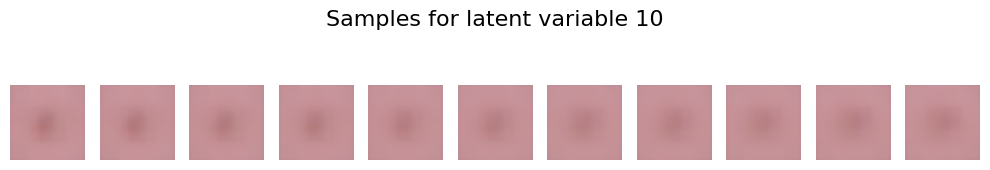

In [51]:
# Visualize samples for each latent variable

for i in range(10):
    
    latent_variable = i

    random_imgs = model.generate_samples_for_latent_variable(latent_variable)

    fig, axes = plt.subplots(1, 11, figsize=(10, 2))

    for i, ax in enumerate(axes.flat):
        image = denormalize_image(random_imgs[i])
        ax.imshow(image)
        ax.axis('off')

    plt.suptitle(f"Samples for latent variable {latent_variable + 1}", fontsize=16)
    plt.tight_layout()

    plt.show()

100
200
300
400
500
600
700
800
900
1000


wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)


1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200


/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/matplotlib/patches.py:738: RuntimeWarning: invalid value encountered in scalar add
  x1 = self.convert_xunits(self._x0 + self._width)
/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/matplotlib/transforms.py:2041: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[0, 2] += tx


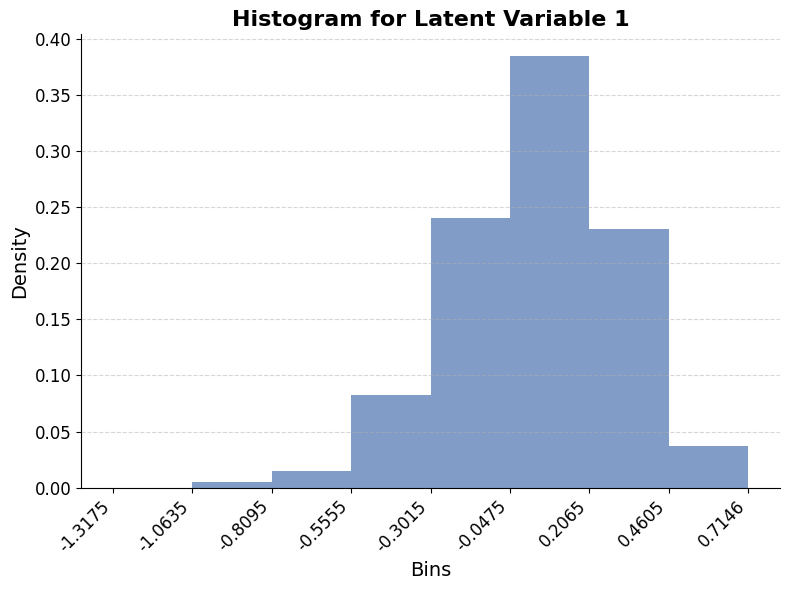

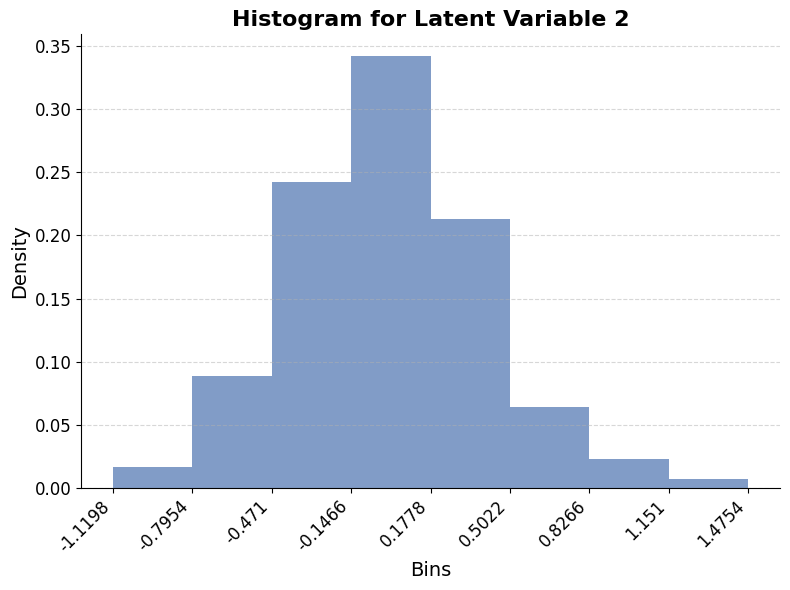

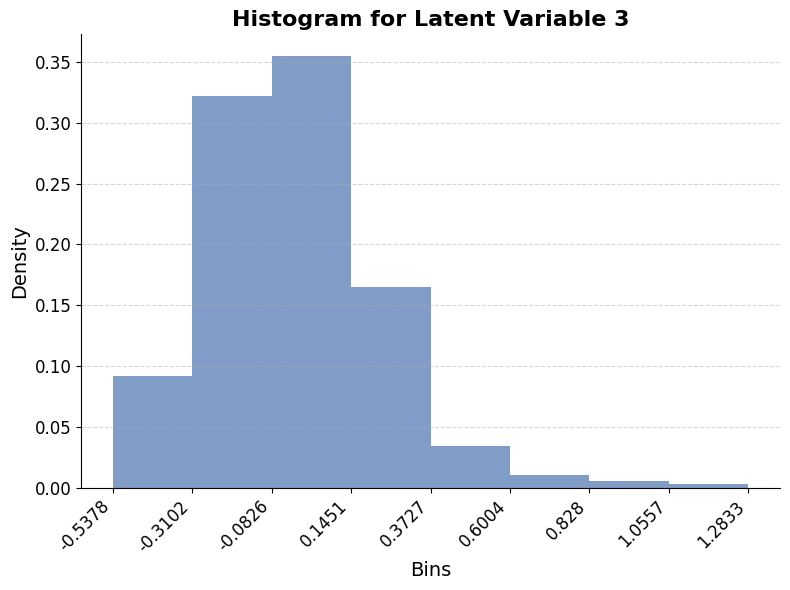

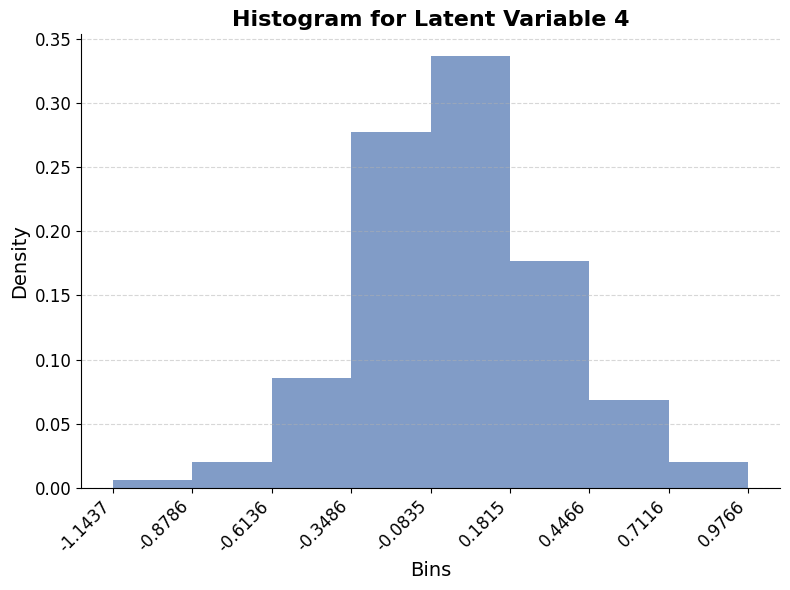

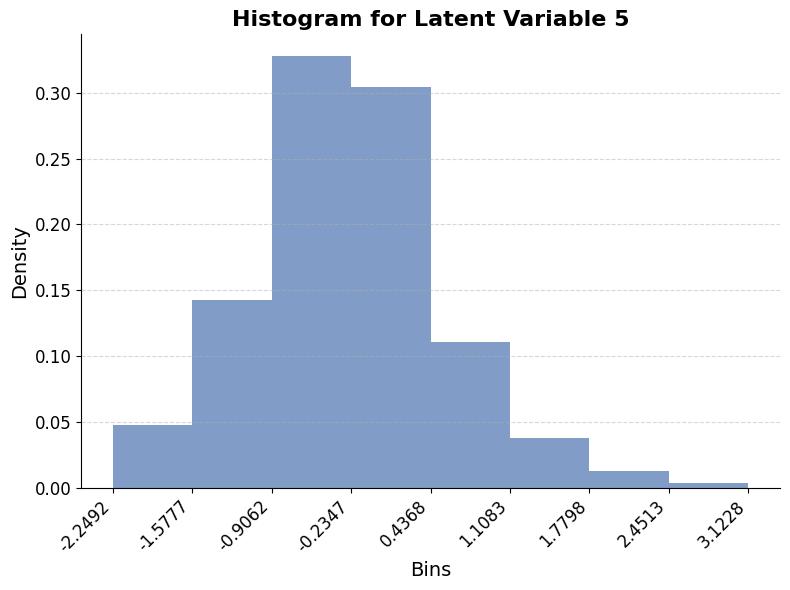

0.5


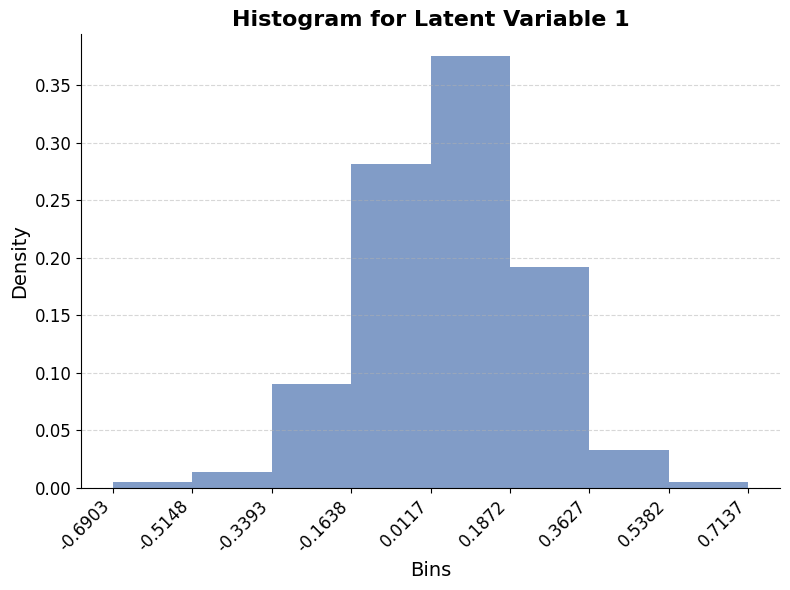

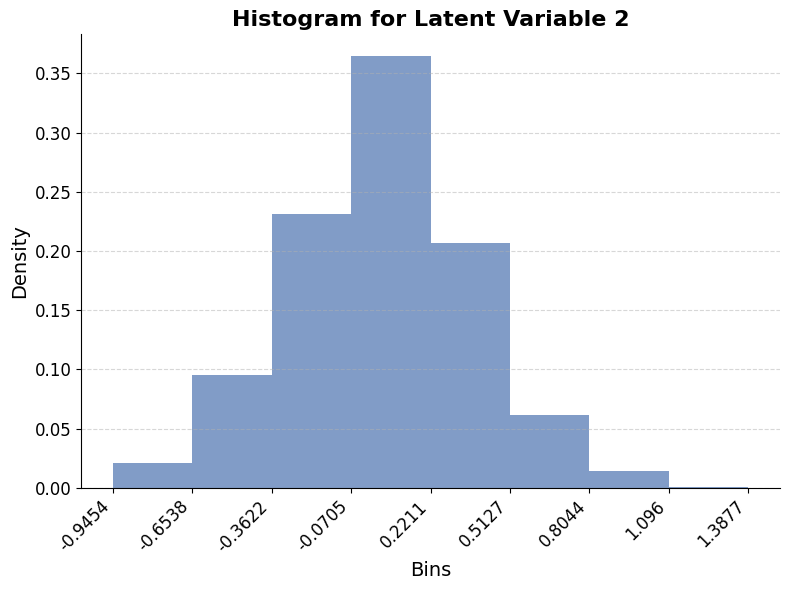

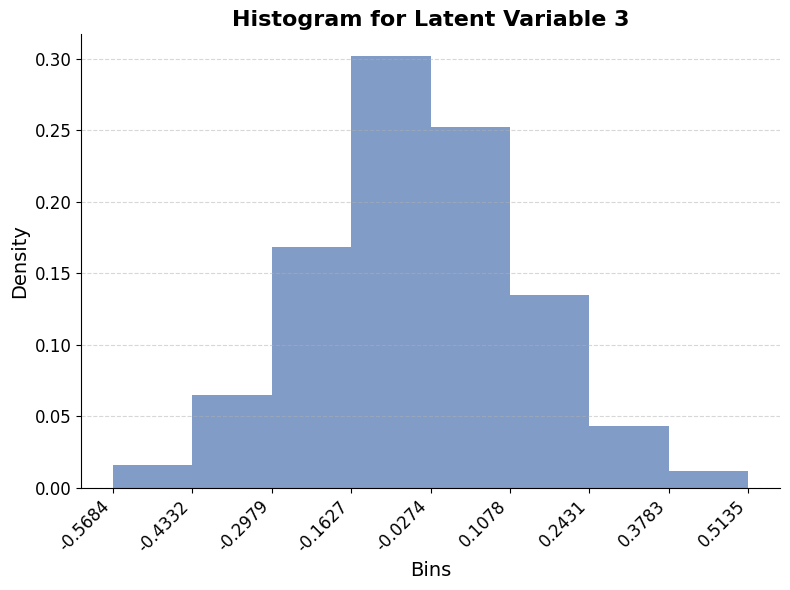

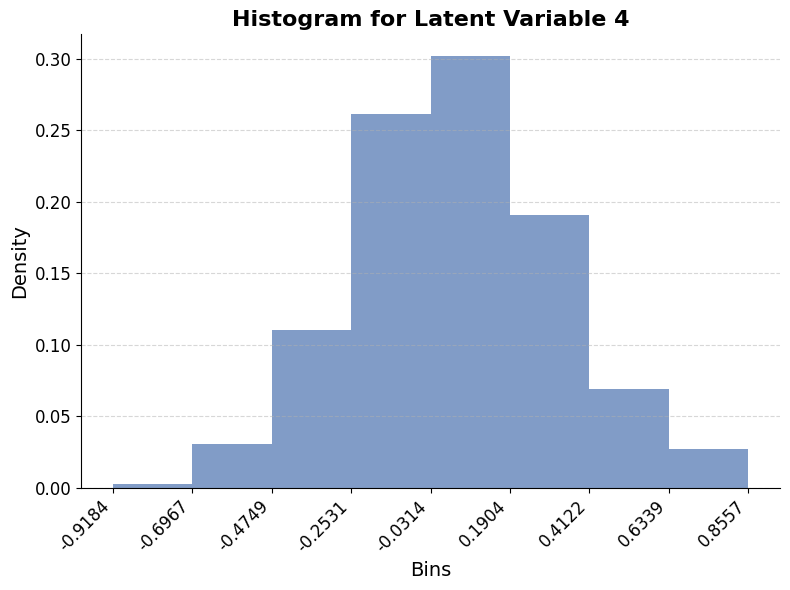

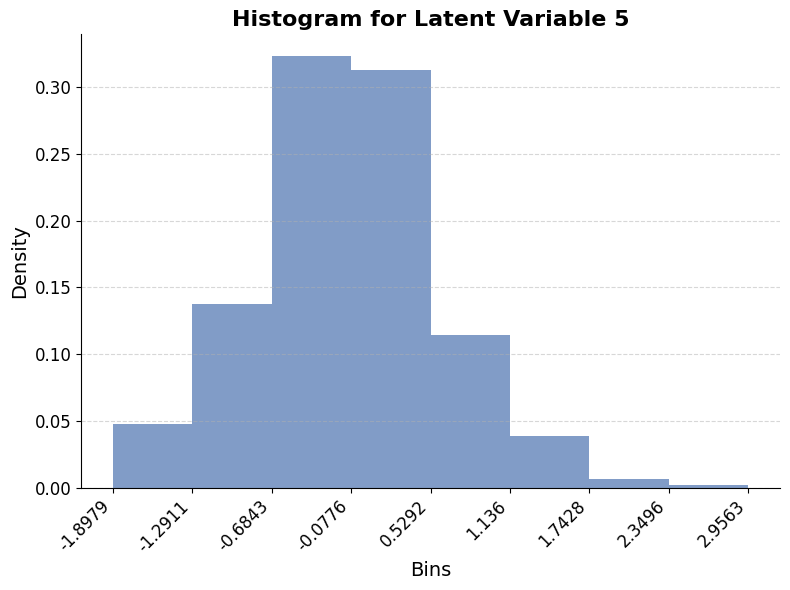

0.5
[0.00019125 0.000153   0.00017    ... 0.00038099 0.00101598 0.00021771]
['ISIC_0024310' 'ISIC_0024313' 'ISIC_0024315' ... 'ISIC_0025930'
 'ISIC_0025931' 'ISIC_0025933']


wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)


In [58]:
val_sample_p, val_isic_ids = calculate_sample_probabilities("train", model, True, num_classes=2)

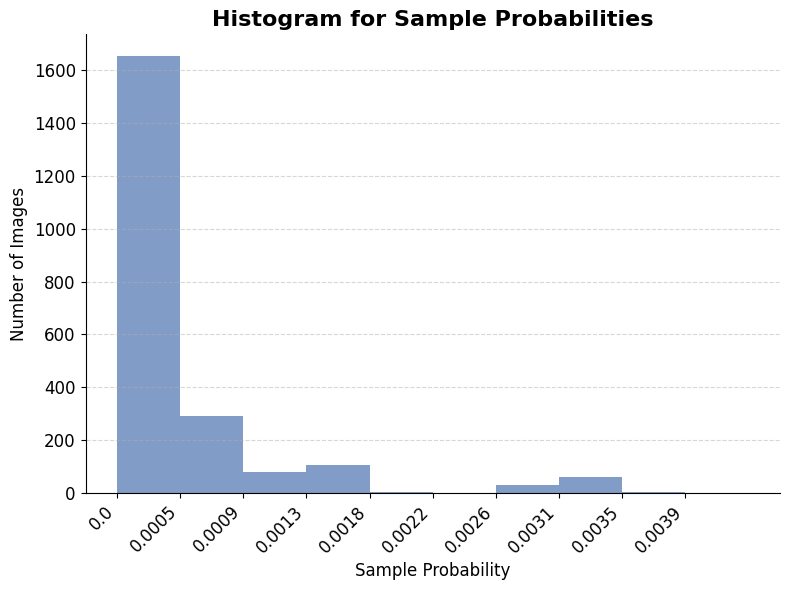

wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wand

In [59]:
# Plot sample probabilities

bins = 10
hist_density, bin_edges = np.histogram(val_sample_p, density=False, bins=bins)
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(bin_edges[:-1], hist_density, width=np.diff(bin_edges), align='edge', alpha=0.7, color='#4c72b0')
ax.set_xlabel('Sample Probability', fontsize=12)
ax.set_ylabel('Number of Images', fontsize=12)
ax.set_xticks(bin_edges[:-1])
ax.set_title('Histogram for Sample Probabilities', fontsize=16, fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)
formatted_labels = [round(label, 4) for label in bin_edges[:-1]]
ax.set_xticklabels(formatted_labels, rotation=45, ha='right')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

[1.51907140e-04 1.67897371e-04 3.98756257e-04 ... 3.14888964e-04
 6.29778018e-04 8.97119628e-05]
[ 898  944  638  413 1633  805 2175 1344 2012  625]
ISIC_0033387
ISIC_0033578
ISIC_0031953
ISIC_0029028
ISIC_0025080
ISIC_0032982
ISIC_0025866
ISIC_0024655
ISIC_0025625
ISIC_0031746


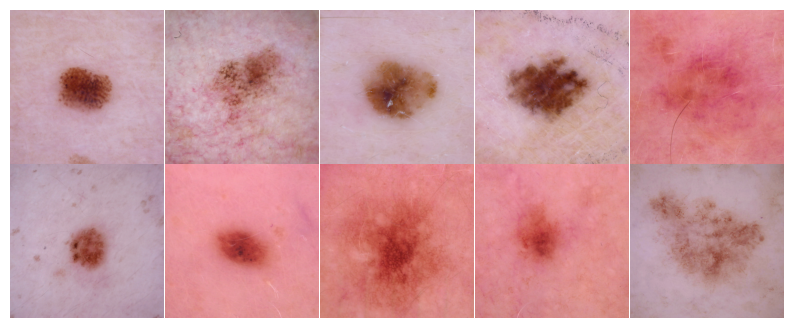

[ 109  459  908  103  189  345   89 1696 1504 1986]
ISIC_0025524
ISIC_0029575
ISIC_0033428
ISIC_0025451
ISIC_0026586
ISIC_0028228
ISIC_0025277
ISIC_0025168
ISIC_0024891
ISIC_0025581


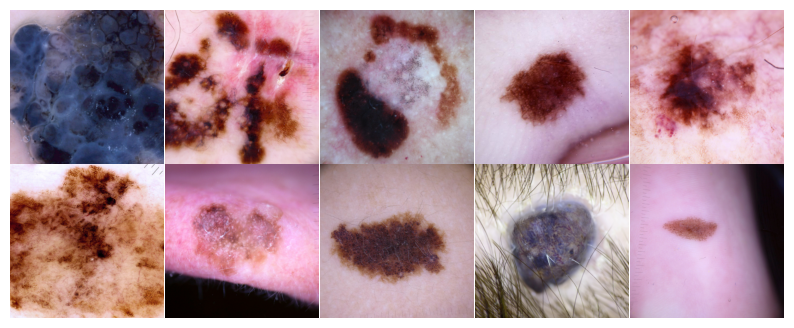

In [46]:
# Plot images with high and low sampling probability
print(val_sample_p)
argmins = np.argsort(val_sample_p)[:10]
print(argmins)

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    isic_id = val_isic_ids[argmins[i]]
    print(isic_id)
    image = val_set.get_image_from_isic_id(isic_id)
    image = denormalize_image(image)
    ax.imshow(image)
    ax.axis('off')

plt.subplots_adjust(hspace=0, wspace=0)
plt.show()



argmaxs = np.argsort(val_sample_p)[-10:]
print(argmaxs)

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    isic_id = val_isic_ids[argmaxs[i]]
    print(isic_id)
    image = val_set.get_image_from_isic_id(isic_id)
    image = denormalize_image(image)
    ax.imshow(image)
    ax.axis('off')

plt.subplots_adjust(hspace=0, wspace=0)
plt.show()



In [10]:
# write probabilities to csv file

data_dict = {"isic_id": val_isic_ids, "sample_probability":val_sample_p.tolist()}
dataframe = pd.DataFrame(data_dict)
dataframe.to_csv("./train_sample_probabilities.csv")

In [38]:
train_sample_p, train_isic_ids = calculate_sample_probabilities("train", model, num_classes=2)

data_dict = {"isic_id": train_isic_ids, "sample_probability": train_sample_p.tolist()}
dataframe = pd.DataFrame(data_dict)
dataframe.to_csv("./train_sample_probabilities.csv")


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
0.25
0.25000000000000006
0.25
0.25
[3.03689642e-05 1.30820153e-04 4.25165542e-05 ... 6.81908398e-05
 5.45526657e-04 2.04572513e-04]
['ISIC_0024310' 'ISIC_0024313' 'ISIC_0024315' ... 'ISIC_0034303'
 'ISIC_0034315' 'ISIC_0034318']
